# PyROOT
E' il binding python di root. Oltre a portare tutte le feature di root su python permette di caricare header e codice c++ in python 

In [2]:
import ROOT

Welcome to JupyROOT 6.26/02


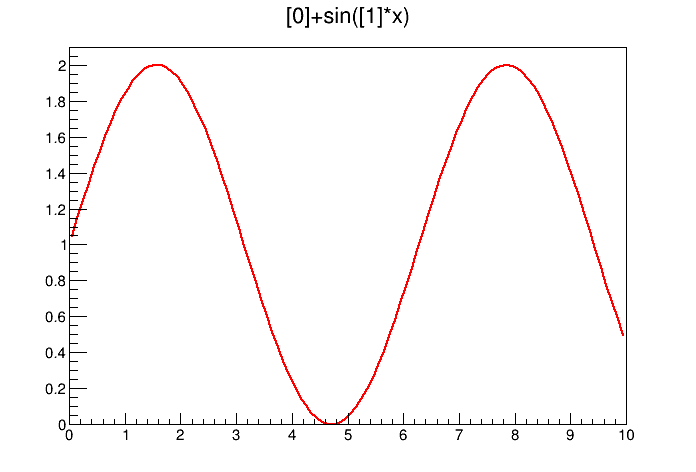

In [14]:
#Esempio plot funzione
g=ROOT.TGraph()
c=ROOT.TCanvas()
func=ROOT.TF1("func","[0]+sin([1]*x)",0,10)
func.SetParameters(1,1)
func.Draw()
c.Draw()


## Importare codice cpp
Per importare il codice basta scrivere il sorgente (o importarlo) come stringa e poi eseguirlo con
ROOT.gInterpreter.ProcessLine(cpp_string)

(Si possono fare anche cose abbastanza complicate come creare delle classi in modo da poter creare delle istanze direttamente in python)

E' possibile caricare anche una shared library usando il comando ROOT.gSystem.Load(path)

In [4]:
cpp_code="""
int f(int i){return i*i;}
"""
ROOT.gInterpreter.ProcessLine(cpp_code)
x=ROOT.f(5)
print(x)

#La stessa cosa si può fare se si vuole importare un header o una shared library

25


# Files
Funziona essenzialmente tutto come ROOT in c++

In [24]:
import numpy as np
f= ROOT.TFile("file.root","RECREATE")
tree=ROOT.TTree("tree","tree")
x=np.array([1,2,3,4,5]).astype(np.float32) #E' importante far matchare i tipi
tree.Branch("x",x,'x[5]/F')
tree.Fill()
f.Write()
f.Close()

# TTree

In [25]:
f=ROOT.TFile.Open("file.root")
f.tree.ls()

OBJ: TTree	tree	tree : 0 at: 0x56463a84a000


In [26]:
f.tree.Scan()

5

***********************************
*    Row   * Instance *       x.x *
***********************************
*        0 *        0 *         1 *
*        0 *        1 *         2 *
*        0 *        2 *         3 *
*        0 *        3 *         4 *
*        0 *        4 *         5 *
***********************************


In [34]:
for row in f.tree:
    print(np.array(row.x))

[1. 2. 3. 4. 5.]


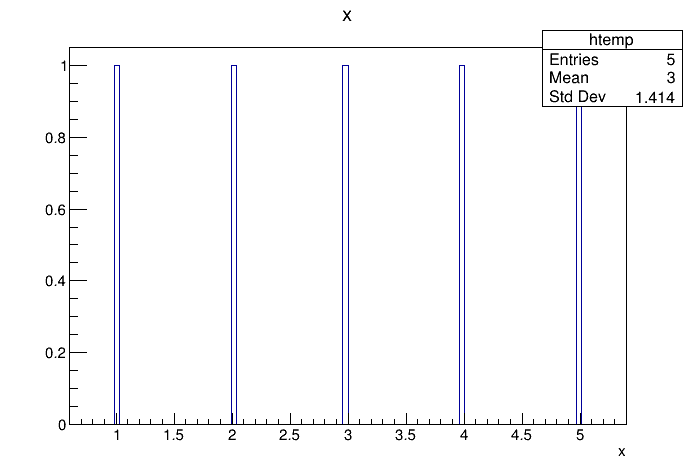

In [37]:
c=ROOT.TCanvas()
f.tree.Draw("x")
c.Draw()

# RDataframe

RDataframe supporta la conversione in pandas e numpy

Per trasformare dataframe in numpy basta df.AsNumpy() e una volta fatto di può portare in pandas.
E' possibile passare funzioni python alle istruzioni di RDataFrame ma bisogna usare NUMBA (bella porcata)

# Uproot
Uproot è una libreria per legere file root senza dover usare root

E' più facile fare degli esempi che spiegare come funziona


Il problema è che serve in più la libreria awkward per gestire gli inner loop

In [26]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

#Apro file e seleziono tree
file=uproot.open("inputdata.root")
tree=file["TreeB"]

#converto ad array awkward
np_tree=tree.arrays()
print(np_tree) #Questo è un awkward array

[{var1: -2.76, var2: -1.49, var3: -1.62, ... var4: -1.61, weight: 0.747}]


(array([  1.,   0.,   0.,   0.,   2.,  12.,  21.,  22.,  57.,  65.,  83.,
        125., 136., 160., 162., 181., 164., 175., 196., 186., 170., 188.,
        170., 186., 185., 185., 186., 177., 176., 165., 199., 170., 164.,
        179., 193., 192., 172., 187., 176., 166., 182., 137., 105.,  80.,
         69.,  47.,  20.,  12.,  11.,   3.]),
 array([-5.8991194 , -5.6858587 , -5.472598  , -5.2593374 , -5.046077  ,
        -4.8328166 , -4.619556  , -4.4062953 , -4.1930346 , -3.979774  ,
        -3.7665133 , -3.553253  , -3.3399923 , -3.1267316 , -2.913471  ,
        -2.7002106 , -2.48695   , -2.2736893 , -2.0604286 , -1.8471681 ,
        -1.6339076 , -1.4206469 , -1.2073864 , -0.9941257 , -0.78086513,
        -0.56760454, -0.35434395, -0.14108336,  0.07217724,  0.28543782,
         0.4986984 ,  0.711959  ,  0.9252196 ,  1.1384802 ,  1.3517408 ,
         1.5650014 ,  1.778262  ,  1.9915226 ,  2.2047832 ,  2.4180439 ,
         2.6313043 ,  2.844565  ,  3.0578256 ,  3.2710862 ,  3.4843466 ,
 

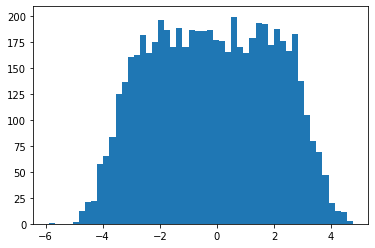

In [28]:
plt.hist(np_tree["var1"],50)